In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
# Customizations
sns.set() # matplotlib defaults

# Any tweaks that normally go in .matplotlibrc, etc., should explicitly go here
plt.rcParams['figure.figsize'] = (12, 8)
%config InlineBackend.figure_format='retina'

## Load some data into a pandas Dataframe

In [13]:
from IPython.display import IFrame

In [14]:
IFrame("http://www.eia.gov/coal/data.cfm", width=700, height=350)

In [15]:
dframe = pd.read_csv("./data/coal_prod_cleaned.csv")

In [16]:
# Tip use .head()
dframe.head()

,MSHA_ID,Average_Employees,Company_Type,Labor_Hours,Mine_Basin,Mine_County,Mine_Name,Mine_State,Mine_Status,Mine_Type,Operating_Company,Operating_Company_Address,Operation_Type,Production_short_tons,Union_Code,Year
0,102838,4.0,Independent Producer Operator,2712.0,Appalachia Southern,Bibb,Hebron Mine,Alabama,Permanently abandoned,Surface,Birmingham Coal & Coke Company,"2477 Valleydale Rd. S. B3, Birmingham, AL 35244",Mine only,10572.0,NaN,2002
1,103184,5.0,Independent Producer Operator,2480.0,Appalachia Southern,Fayette,Berry Mine,Alabama,Temporarily closed,Surface,Midas Coal Company Incorporate,"401 10th Avenue, S. E, Cullman, AL 35055",Mine only,9725.0,NaN,2002
2,100329,55.0,Operating Subsidiary,123618.0,Appalachia Southern,Jefferson,Concord Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Road, Adger, AL 35006",Preparation Plant,0.0,United Mine Workers of America,2002
3,100851,331.0,Operating Subsidiary,748182.0,Appalachia Southern,Jefferson,Oak Grove Mine,Alabama,Active,Underground,U S Steel Mining Company Llc,"8800 Oak Grove Mine Rd, Adger, AL 35006",Mine only,1942153.0,United Mine Workers of America,2002
4,102354,28.0,Independent Producer Operator,55306.0,Appalachia Southern,Jefferson,Lindbergh,Alabama,Active,Surface,C & H Mining Company Inc,"P.O. Box 70250, Tuscaloosa, AL 35407",Mine only,168446.0,NaN,2002


In [17]:
_9

NameError: name '_9' is not defined

In [18]:
_i7

u'IFrame("http://www.eia.gov/coal/data.cfm", width=700, height=350)'

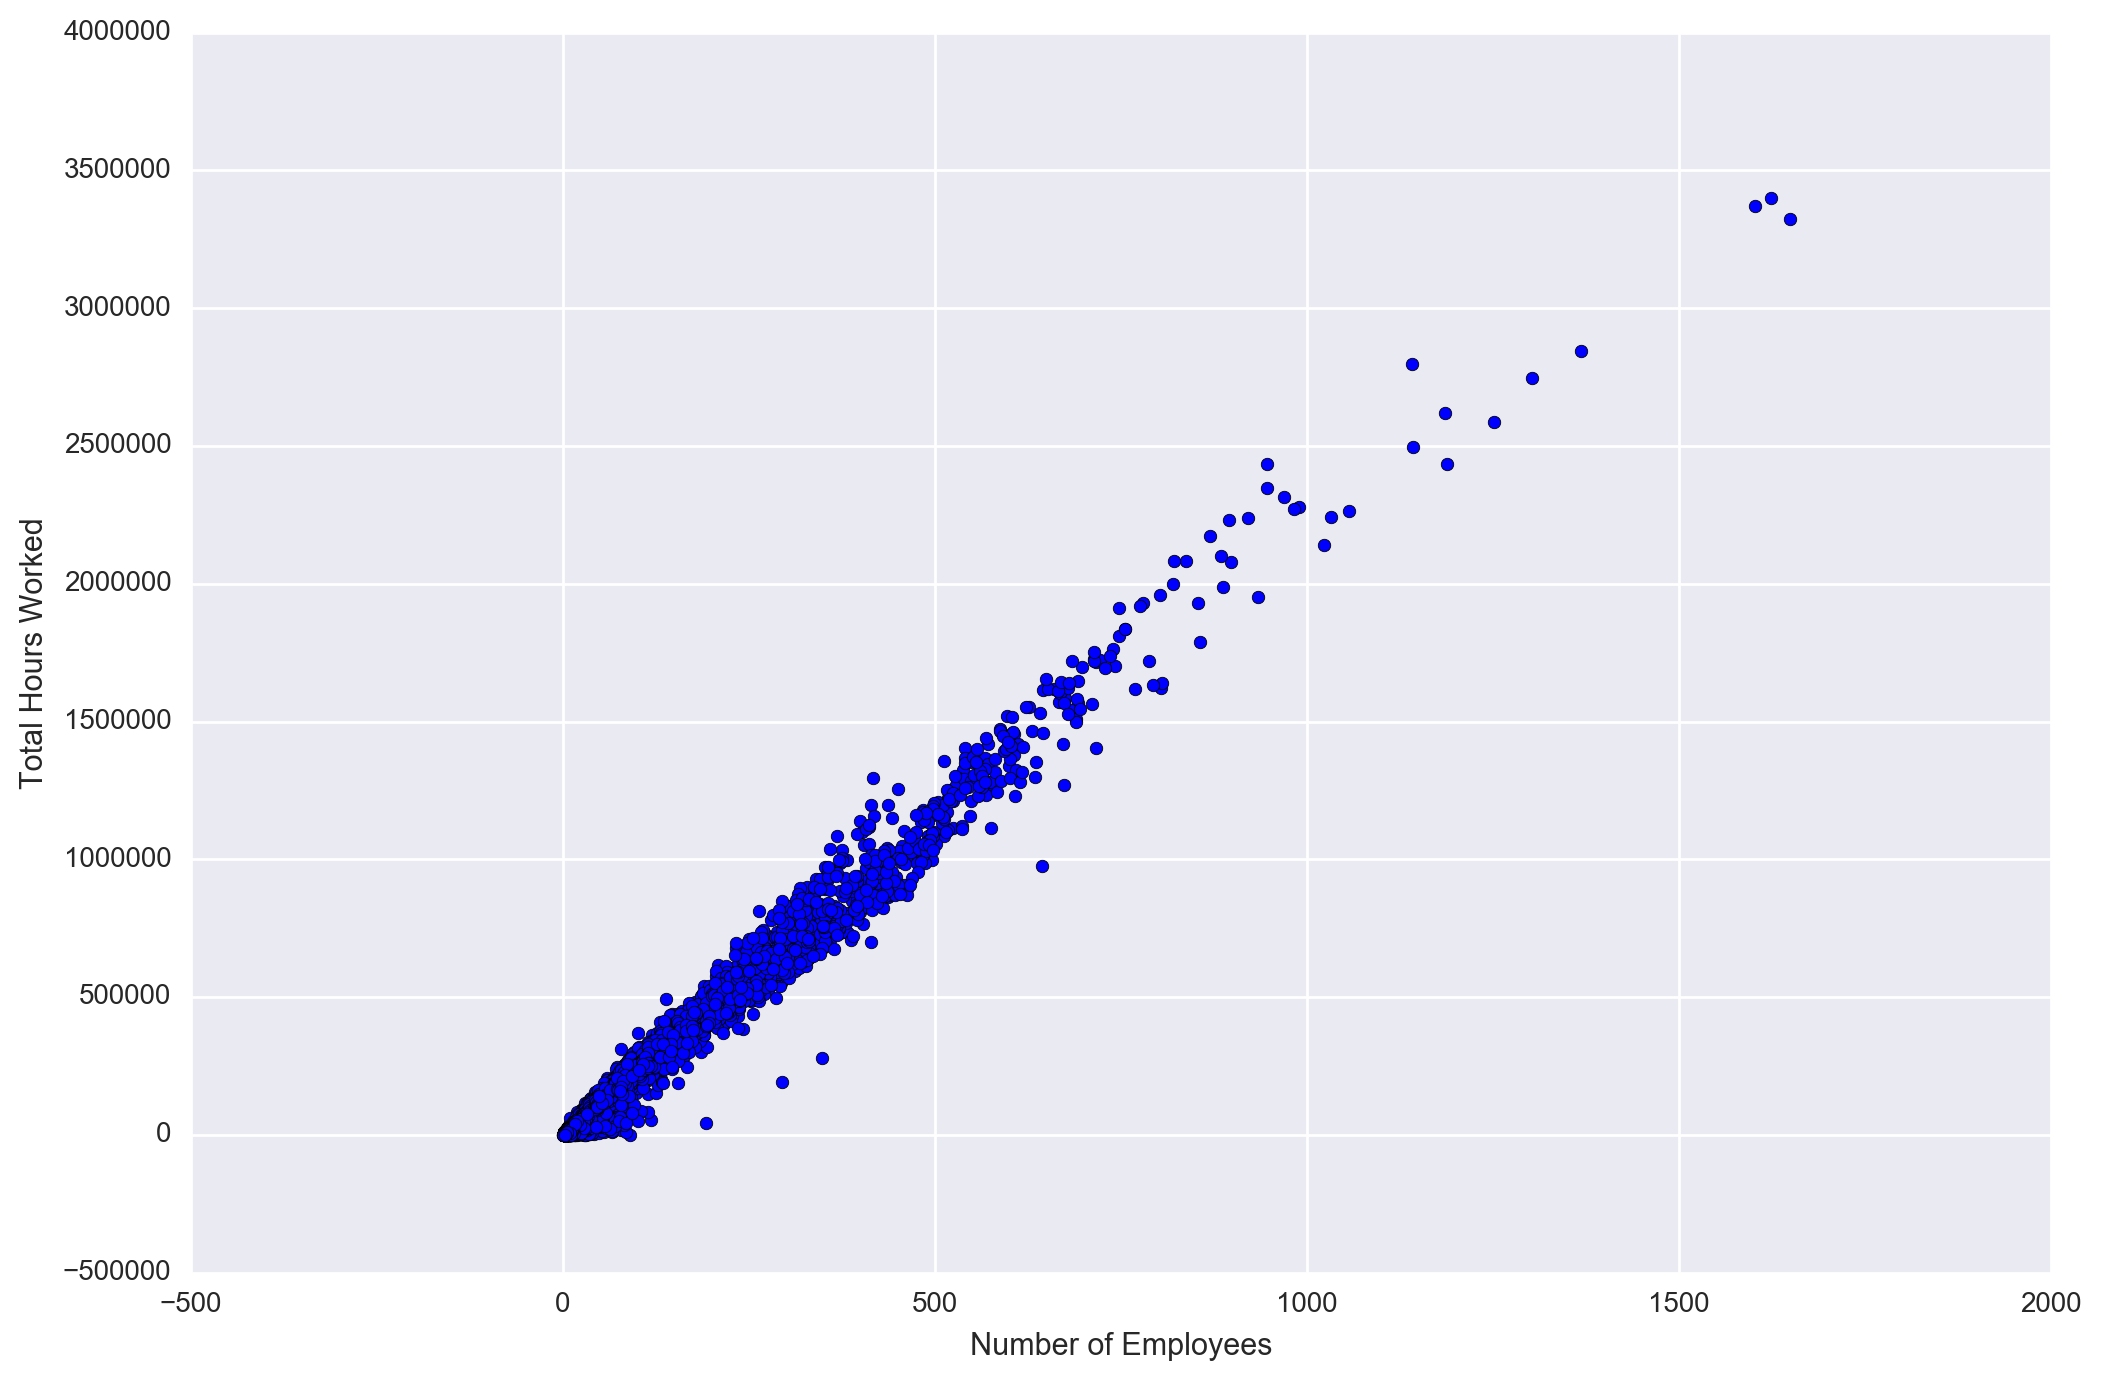

In [19]:
plt.scatter(dframe.Average_Employees, dframe.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

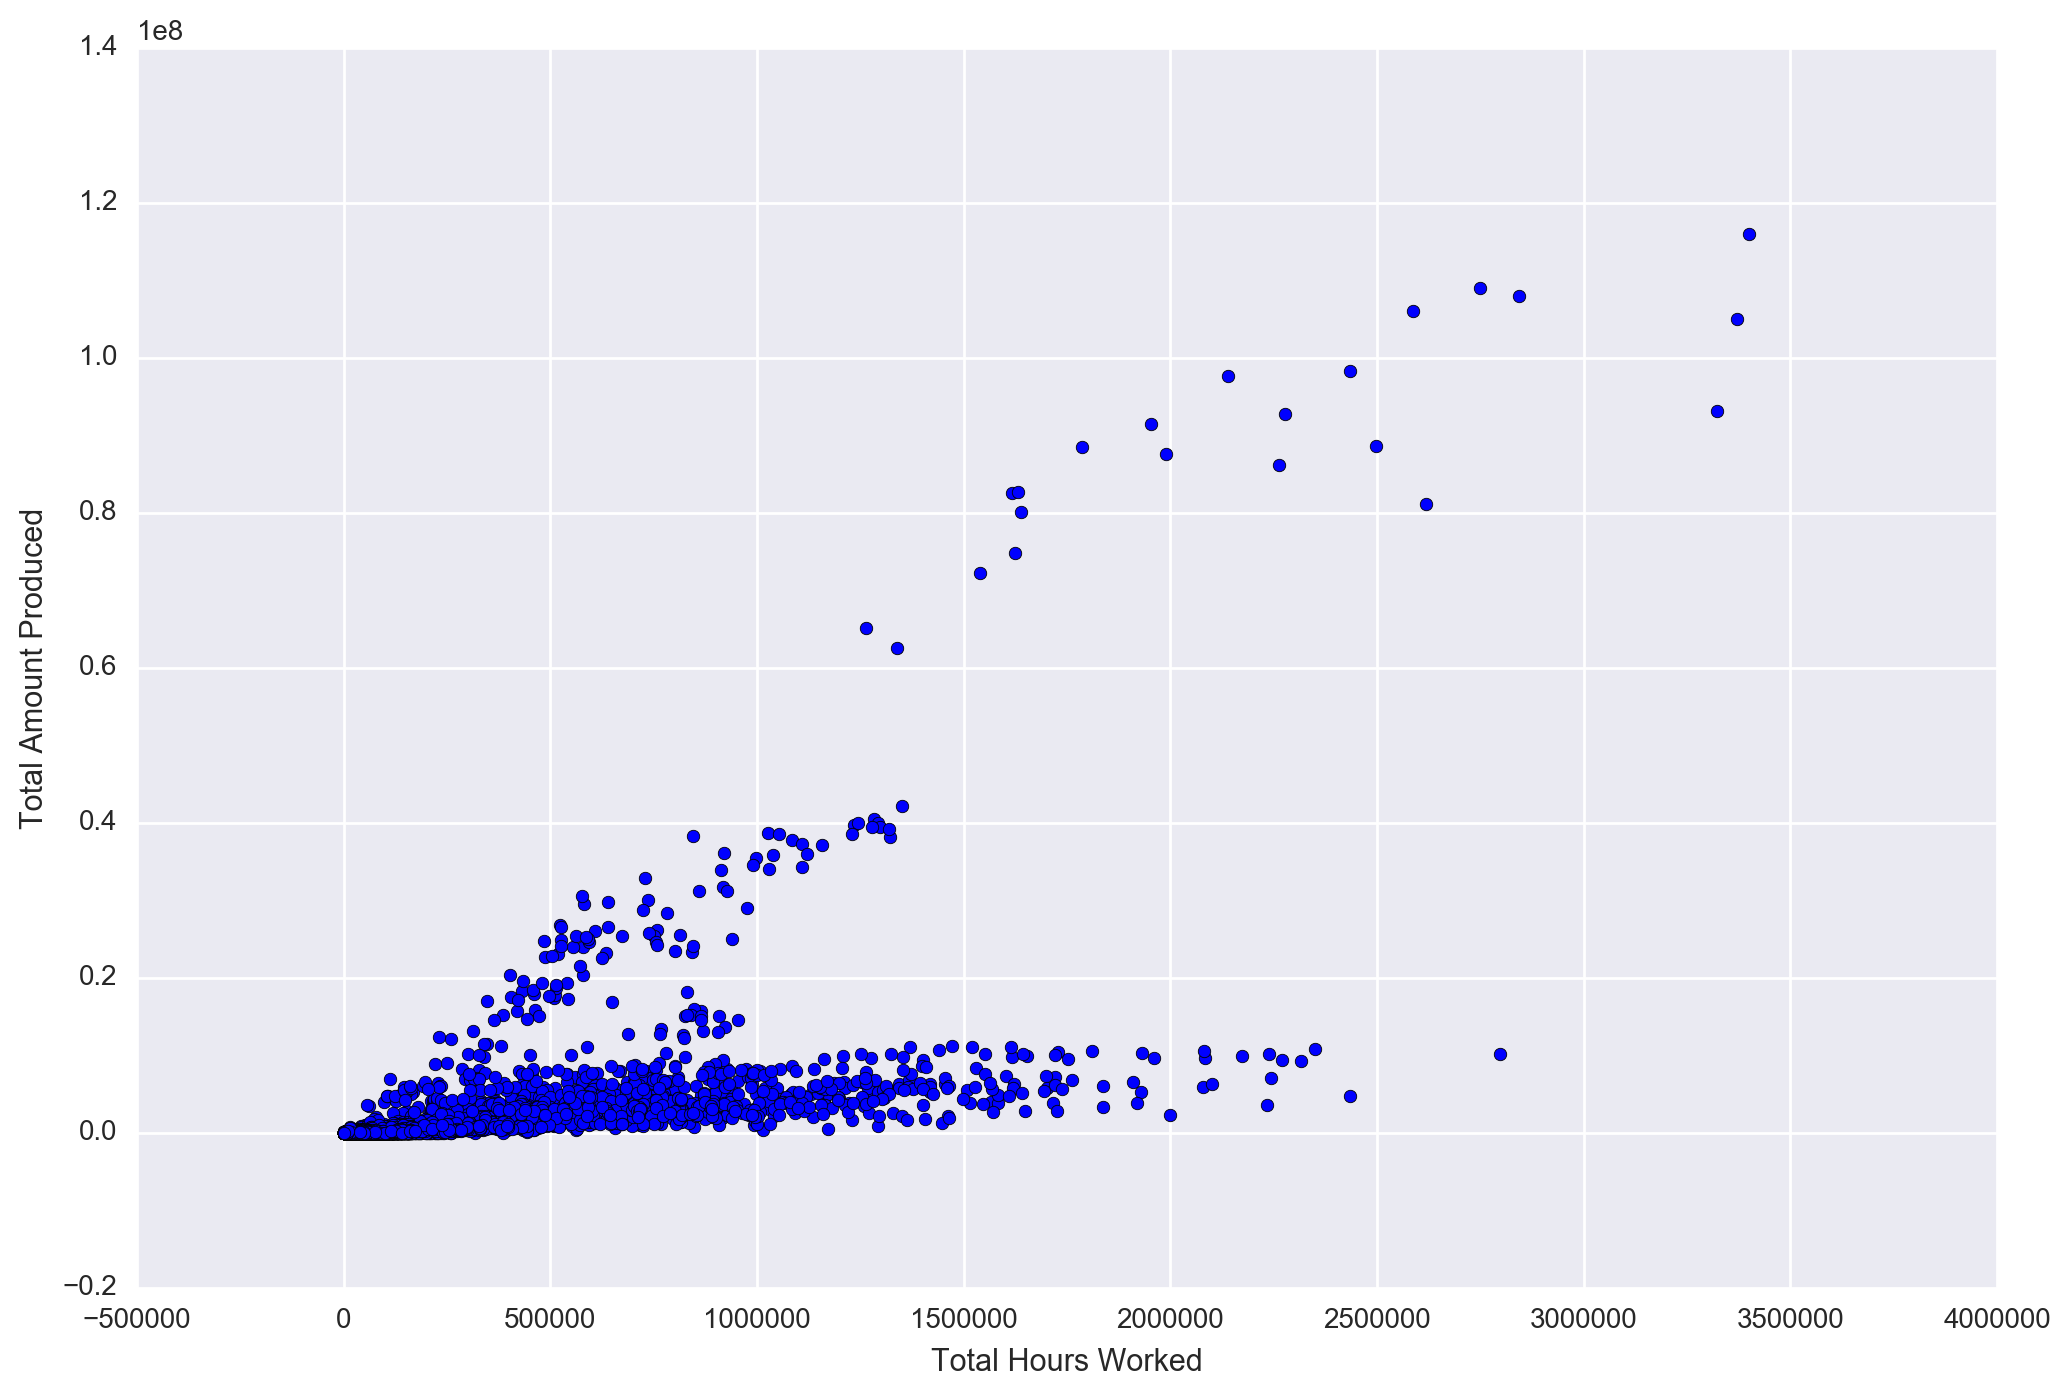

In [20]:
plt.scatter(dframe.Labor_Hours, dframe.Production_short_tons, )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced") 

In [21]:
years = sorted(dframe.Year.unique())
colors = sns.color_palette(n_colors=len(years))
color_dict = {key: value for key, value in zip(years, colors)} 

In [22]:
color_dict 

{2002: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2003: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2004: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2005: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2006: (0.8, 0.7254901960784313, 0.4549019607843137),
 2007: (0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 2008: (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 2009: (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 2010: (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 2011: (0.5058823529411764, 0.4470588235294118, 0.6980392156862745),
 2012: (0.8, 0.7254901960784313, 0.4549019607843137)}

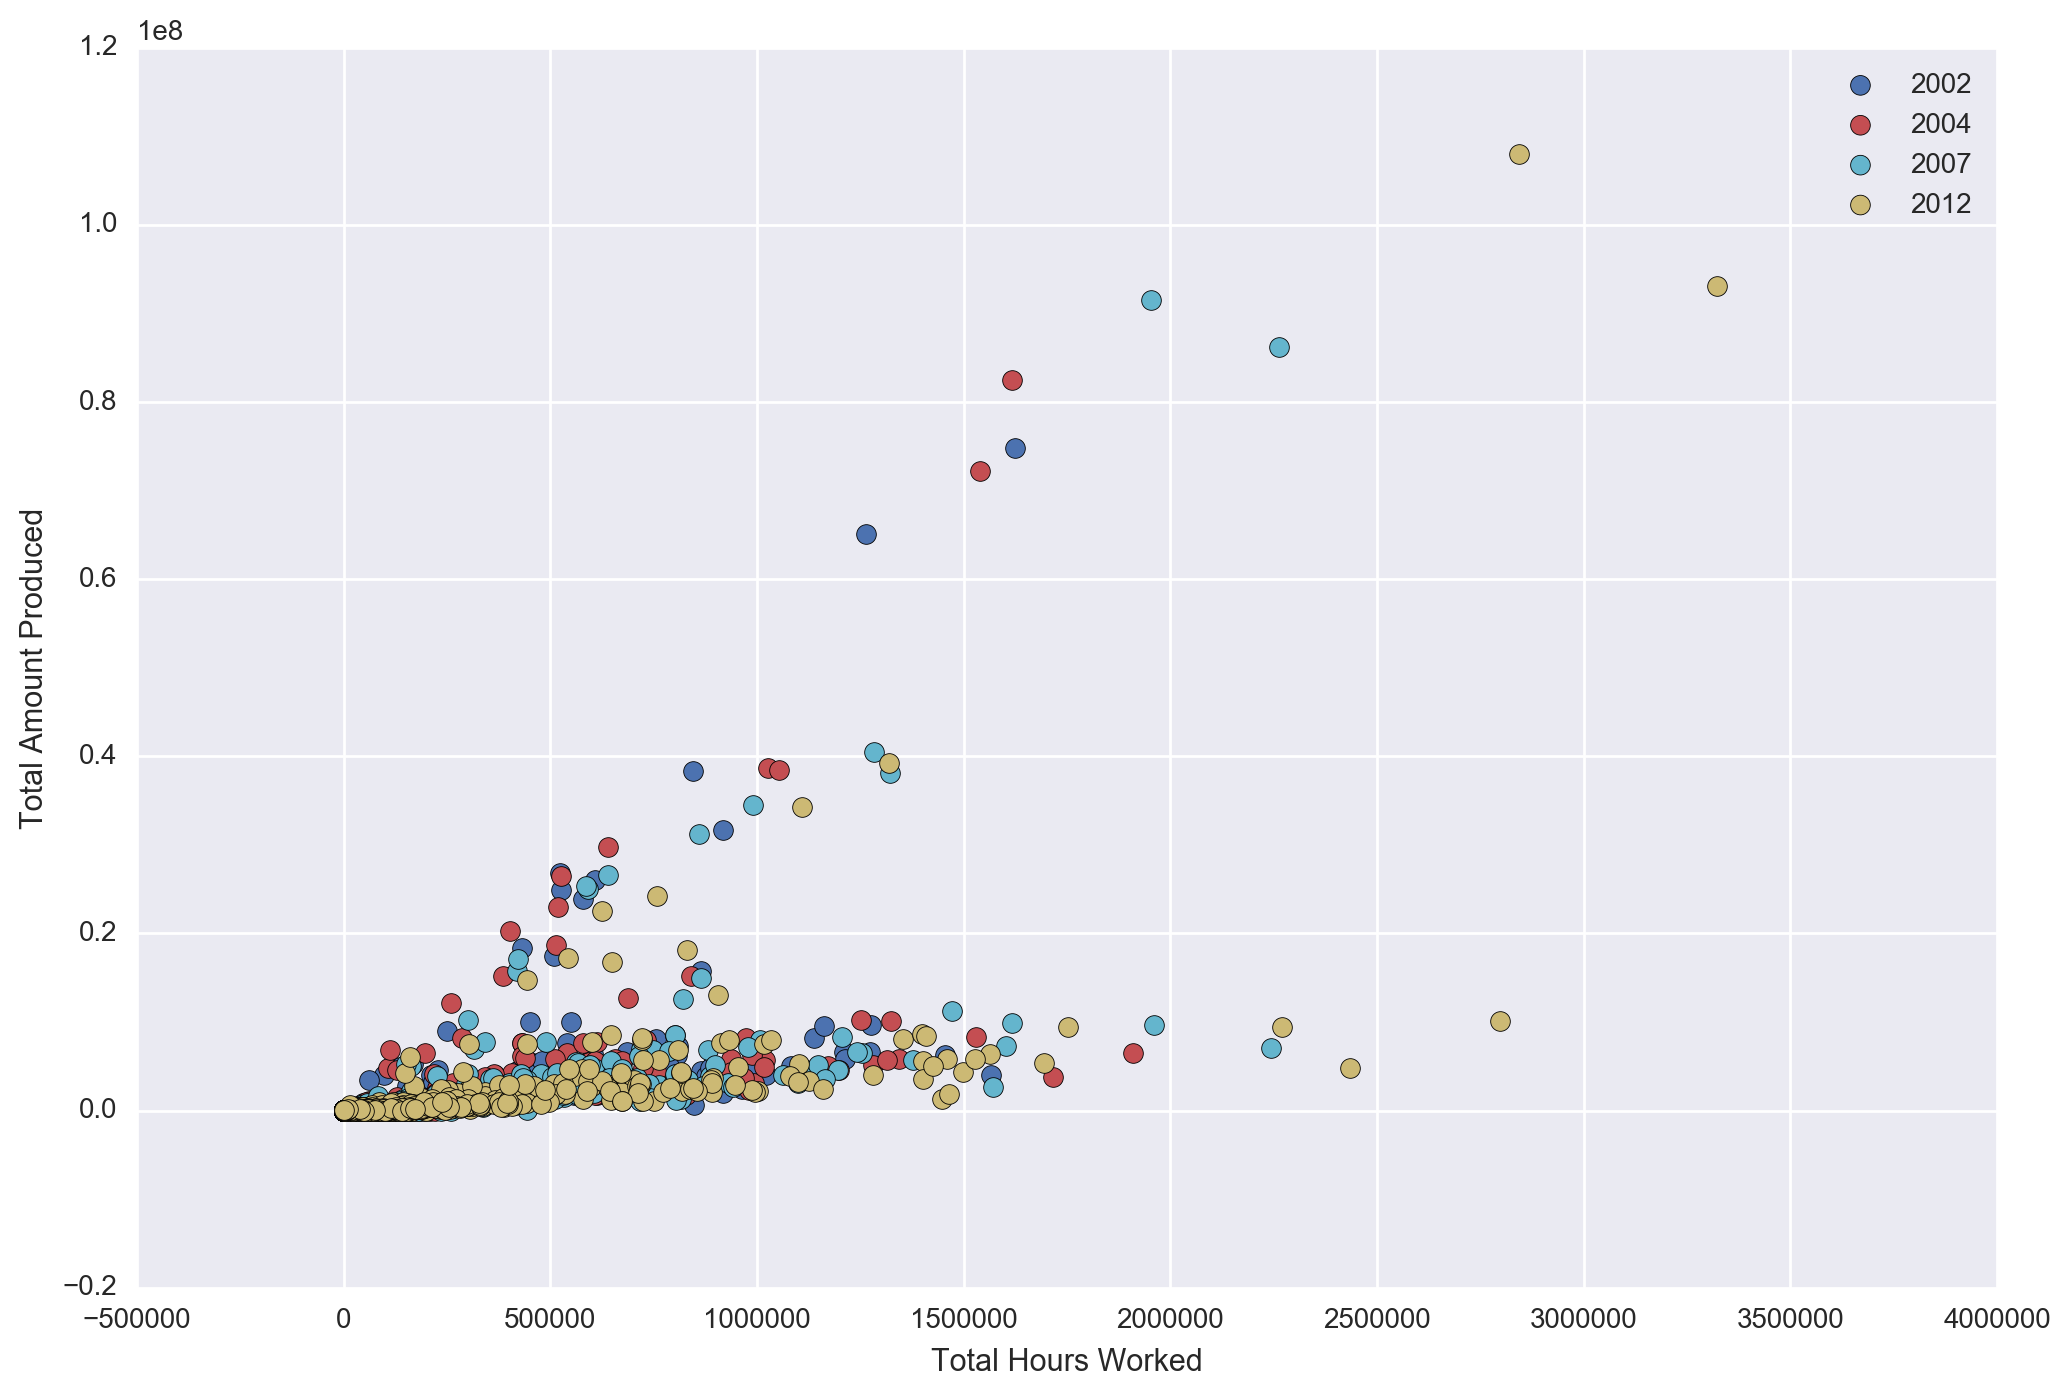

In [23]:
for year in sorted(dframe.Year.unique()[[0,2, 5, -1]]):
    plt.scatter(dframe[dframe.Year == year].Labor_Hours,
                dframe[dframe.Year == year].Production_short_tons, 
                c=color_dict[year],
                s=50,
                label=year,
               )
plt.xlabel("Total Hours Worked")
plt.ylabel("Total Amount Produced")
plt.legend()

## Notebook extensions

Check out http://nbviewer.ipython.org/github/quantopian/qgrid/blob/master/qgrid_demo.ipynb for more (including demo)


In [24]:
import qgrid # Best practices is to put imports at the top of the Notebook.
qgrid.nbinstall(overwrite=True)

In [25]:
qgrid.show_grid(dframe[['MSHA_ID', 'Year', 'Mine_Name', 'Mine_State', 'Mine_County']], remote_js=True)

## SQL queries

An updated implementation SQL magic command from Christian Perez at SVDS https://github.com/cfperez/ipython-sql

In [26]:
%load_ext sql
%reload_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [27]:
%config SqlMagic.autopandas=True

In [28]:
coalproduction = dframe.copy()

## Create table in sqlite database

%% magics 

In [29]:
%%sql sqlite://
PERSIST coalproduction

u'Persisted coalproduction'

## Query database 

In [32]:
%%sql sqlite://

SELECT DISTINCT company_type 
FROM coalproduction 
WHERE msha_id > 5000020

Done.


,Company_Type
0,Independent Producer Operator


In [33]:
dbtest = %sql SELECT * FROM coalproduction 

Done.


In [34]:
dbtest[['Company_Type', 'Mine_Basin']].head()

,Company_Type,Mine_Basin
0,Independent Producer Operator,Appalachia Southern
1,Independent Producer Operator,Appalachia Southern
2,Operating Subsidiary,Appalachia Southern
3,Operating Subsidiary,Appalachia Southern
4,Independent Producer Operator,Appalachia Southern


In [35]:
type(dbtest)

pandas.core.frame.DataFrame

In [36]:
print "Hi!"

Hi!
